## Feature Engineer

![](../img/feature_engineer.png)

This section covers some libraries for feature engineering. 

### Split Data in a Stratified Fashion in scikit-learn

Normally, after using scikit-learn's `train_test_split`, the proportion of values in the sample will be different from the proportion of values in the entire dataset. 

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_iris(return_X_y=True)
np.bincount(y)

array([50, 50, 50])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# Get count of each class in the train set

np.bincount(y_train)

array([37, 34, 41])

In [42]:
# Get count of each class in the test set

np.bincount(y_test)

array([13, 16,  9])

If you want to keep the proportion of classes in the sample the same as the proportion of classes in the entire dataset, add `stratify=y`. 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [38]:
np.bincount(y_train)

array([37, 37, 38])

In [39]:
np.bincount(y_test)

array([13, 13, 12])

### Strategy to Prevent Data Leakage in Time-correlated Datasets

If you randomly split time-correlated datasets for machine learning models, your training set may contain future transactions, leading to biased predictions.

To avoid data leakage in time-correlated datasets, split the data by time.

In [14]:
import pandas as pd
from datetime import datetime 

# Create the example dataset
data = {'customer_id': [1, 2, 3, 4, 5],
        'amount': [10.00, 20.00, 15.00, 25.00, 30.00],
        'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05']}
df = pd.DataFrame(data)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [17]:
from sklearn.model_selection import train_test_split

# Split the data randomly into training and test sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

print(f'Train data:\n{train_data}')
print(f'Test data:\n{test_data}')

Train data:
   customer_id  amount       date
2            3    15.0 2021-01-03
0            1    10.0 2021-01-01
3            4    25.0 2021-01-04
Test data:
   customer_id  amount       date
1            2    20.0 2021-01-02
4            5    30.0 2021-01-05


In [16]:
# Set the cutoff date
cutoff_date = datetime(2021, 1, 4)

# Split the data into training and test sets by time
train_data = df[df['date'] < cutoff_date]
test_data = df[df['date'] >= cutoff_date]

print(f'Train data:\n{train_data}')
print(f'Test data:\n{test_data}')

Train data:
   customer_id  amount       date
0            1    10.0 2021-01-01
1            2    20.0 2021-01-02
2            3    15.0 2021-01-03
Test data:
   customer_id  amount       date
3            4    25.0 2021-01-04
4            5    30.0 2021-01-05


### Enhancing Data Handling with scikit-learn's DataFrame Support

By default, scikit-learn transformers return a NumPy array. This can pose a challenge if you require the data in a pandas DataFrame for subsequent data processing steps.

Luckily, as of scikit-learn version 1.3.2, you can use the `set_output` method to obtain the results as a pandas DataFrame.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Create a small pandas DataFrame
data = {
    "age": [25, 30, None, 35],
    "income": [50000, 60000, 70000, None],
}
df = pd.DataFrame(data)


In [66]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [        nan,  1.22474487],
       [ 1.22474487,         nan]])

In [69]:
scaler = StandardScaler().set_output(transform='pandas')
print(scaler.fit_transform(df))

        age    income
0 -1.224745 -1.224745
1  0.000000  0.000000
2       NaN  1.224745
3  1.224745       NaN


This method is not limited to individual transformers but can also be applied within a scikit-learn pipeline.

In [74]:
# Create a pipeline with two transformers
pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
).set_output(transform="pandas")

# Fit and transform the DataFrame using the pipeline
print(pipeline.fit_transform(df))


        age    income
0 -1.414214 -1.414214
1  0.000000  0.000000
2  0.000000  1.414214
3  1.414214  0.000000


### Drop Correlated Features

In [ ]:
!pip install feature_engine 

If you want to remove the correlated variables from a dataframe, use `feature_engine.DropCorrelatedFeatures`. 

In [22]:
import pandas as pd
from sklearn.datasets import make_classification
from feature_engine.selection import DropCorrelatedFeatures

# make dataframe with some correlated variables
X, y = make_classification(
        n_samples=1000,
        n_features=6,
        n_redundant=3,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=0,
    )

# trabsform arrays into pandas df and series
colnames = ["var_" + str(i) for i in range(6)]
X = pd.DataFrame(X, columns=colnames)

<IPython.core.display.Javascript object>

In [23]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5'], dtype='object')

<IPython.core.display.Javascript object>

In [28]:
X[["var_0", "var_1", "var_2"]].corr()

var_0     var_1     var_2
var_0  1.000000  0.938936  0.874845
var_1  0.938936  1.000000  0.654745
var_2  0.874845  0.654745  1.000000

<IPython.core.display.Javascript object>

Drop the variables with a correlation above 0.8. 

In [25]:
tr = DropCorrelatedFeatures(variables=None, method="pearson", threshold=0.8)

Xt = tr.fit_transform(X)

tr.correlated_feature_sets_

[{'var_0', 'var_1', 'var_2'}]

<IPython.core.display.Javascript object>

In [26]:
Xt.columns

Index(['var_0', 'var_3', 'var_4', 'var_5'], dtype='object')

<IPython.core.display.Javascript object>

[Link to feature-engine](https://feature-engine.readthedocs.io/en/1.1.x/).

### Encode Rare Labels with Feature-engine

When dealing with features with high cardinality, you might want to mark the rare categories as "Other". Feature-engine's `RareLabelEncoder` makes it easy for you to do so.

In [15]:
from sklearn.datasets import fetch_openml
from feature_engine.encoding import RareLabelEncoder

data = fetch_openml('dating_profile')['data']
data.head(10)

body_type               diet      drinks      drugs  \
0  a little extra  strictly anything    socially      never   
1         average       mostly other       often  sometimes   
2            thin           anything    socially       None   
3            thin         vegetarian    socially       None   
4        athletic               None    socially      never   
5         average    mostly anything    socially       None   
6             fit  strictly anything    socially      never   
7         average    mostly anything    socially      never   
8            None  strictly anything    socially       None   
9        athletic    mostly anything  not at all      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   
5  graduated from college/university   
6  graduated from college/university   
7  graduated from college/university   
8  graduated from college/university   
9        working on two-year college   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   
5  i'm an australian living in san francisco, but...   
6  life is about the little things. i love to lau...   
7                                               None   
8                                               None   
9  my names jake.<br />\ni'm a creative guy and i...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   
5  building awesome stuff. figuring out what's im...   
6                         digging up buried treasure   
7  writing. meeting new people, spending time wit...   
8  oh goodness. at the moment i have 4 jobs, so i...   
9  i have an apartment. i like to explore and che...   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   
5  imagining random shit. laughing at aforementio...   
6  frolicking<br />\nwitty banter<br />\nusing my...   
7  remembering people's birthdays, sending cards,...   
8                                               None   
9  i'm good at finding creative solutions to prob...   

                                              essay3  \
0  the way i look. i am a six foot half asian, ha...   
1                                               None   
2  my large jaw and large glasses are the physica...   
3                  socially awkward but i do my best   
4            i smile a lot and my inquisitive nature   
5  i have a big smile. i also get asked if i'm we...   
6                              i am the last unicorn   
7  i'm rather approachable (a byproduct of being ...   
8  i'm freakishly blonde and have the same name a...   
9                                          i'm short   

                                              essay4  ...  \
0  books:<br />\nabsurdistan, the republic, of mi...  ...   
1  i am die hard christopher moore fan. i don't r...  ...   
2  okay this is where the cultural matrix gets so...  ...   
3  bataille, celine, beckett. . .<br />\nlynch, j...  ...   
4  music: bands, rappers, musicians<br />\nat the...  ...   
5  books: to kill a mockingbird, lord o

In [20]:
processed = data.dropna(subset=['education'])

In the code below, 
- `tol` species the minimum frequency below which a category is considered rare. 
- `replace_with` species the value to be used to replace rare categories.
- `variables` specify the list of categorical variables that will be encoded.

In [23]:
encoder = RareLabelEncoder(tol=0.05, variables=["education"], replace_with="Other")
encoded = encoder.fit_transform(processed)


Now the rare categories in the column `education` are replaced with "Other".

In [25]:
encoded['education'].sample(10)

46107                                Other
45677       graduated from masters program
57928    graduated from college/university
53127        working on college/university
33300                                Other
33648       graduated from masters program
59701                                Other
57013       graduated from masters program
46428    graduated from college/university
57123    graduated from college/university
Name: education, dtype: object

[Link to feature-engine](https://feature-engine.readthedocs.io/en/1.1.x/).

### Encode Categorical Data Using Frequency

In [ ]:
!pip install feature-engine

Sometimes, count or frequency can be useful features for your model. If you want to replace categories by either the count or the percentage of observations per category, use feature_engine's `CountFrequencyEncoder`.

In [35]:
import seaborn as sns
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.model_selection import train_test_split

data = sns.load_dataset("diamonds")

X_train, X_test, y_train, y_test = train_test_split(data, data["price"], random_state=0)
X_train

carat        cut color clarity  depth  table  price     x     y     z
441     0.89    Premium     H     SI2   60.2   59.0   2815  6.26  6.23  3.76
50332   0.70  Very Good     D     SI1   64.0   53.0   2242  5.57  5.61  3.58
35652   0.31      Ideal     G    VVS2   62.7   57.0    907  4.33  4.31  2.71
9439    0.90  Very Good     H     VS1   62.3   59.0   4592  6.12  6.17  3.83
15824   1.01       Good     F     VS2   60.6   62.0   6332  6.52  6.49  3.94
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
45891   0.52    Premium     F     VS2   60.7   59.0   1720  5.18  5.14  3.13
52416   0.70       Good     D     SI1   63.6   60.0   2512  5.59  5.51  3.51
42613   0.32    Premium     I     VS1   61.3   58.0    505  4.35  4.39  2.68
43567   0.41      Ideal     G      IF   61.0   57.0   1431  4.81  4.79  2.93
2732    0.91      Ideal     F     SI2   61.1   55.0   3246  6.24  6.19  3.80

[40455 rows x 10 columns]

<IPython.core.display.Javascript object>

In the code below, I encode `color` and `clarity`. 

In [36]:
# initiate an encoder
encoder = CountFrequencyEncoder(
    encoding_method="frequency", variables=["color", "clarity"]
)

# fit the encoder
encoder.fit(X_train)

# process the data
p_train = encoder.transform(X_train)
p_test = encoder.transform(X_test)

<IPython.core.display.Javascript object>

In [37]:
p_test

carat        cut     color   clarity  depth  table  price     x     y  \
10176   1.10      Ideal  0.152762  0.170436   62.0   55.0   4733  6.61  6.65   
16083   1.29      Ideal  0.152762  0.242022   62.6   56.0   6424  6.96  6.93   
13420   1.20    Premium  0.100531  0.242022   61.1   58.0   5510  6.88  6.80   
20407   1.50      Ideal  0.179409  0.242022   60.9   56.0   8770  7.43  7.36   
8909    0.90  Very Good  0.179409  0.227314   61.7   57.0   4493  6.17  6.21   
...      ...        ...       ...       ...    ...    ...    ...   ...   ...   
52283   0.59  Very Good  0.182005  0.094401   61.7   59.0   2494  5.37  5.36   
10789   1.00       Fair  0.152762  0.227314   64.8   62.0   4861  6.22  6.13   
1190    0.70  Very Good  0.179409  0.094401   63.2   58.0   2932  5.66  5.60   
3583    0.59      Ideal  0.182005  0.067384   60.7   57.0   3422  5.41  5.45   
40845   0.46    Premium  0.182005  0.227314   61.5   60.0   1173  4.95  4.91   

          z  
10176  4.11  
16083  4.35  
13420  4.18  
20407  4.50  
8909   3.82  
...     ...  
52283  3.31  
10789  4.00  
1190   3.56  
3583   3.29  
40845  3.03  

[13485 rows x 10 columns]

<IPython.core.display.Javascript object>

[Link to feature-engine](https://feature-engine.readthedocs.io/en/1.1.x/).

### Return a DataFrame When Using a scikit-learn's Transformer

In [ ]:
!pip install feature_engine 

Applying a scikit-learn's transformer on your DataFrame will return a NumPy array. 

In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper

In [5]:
df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})
StandardScaler().fit_transform(df)

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

If you want to return a pandas DataFrame instead, use feature-engine's `SklearnTransformerWrapper` along with your scikit-learn's tranformer.

In [8]:
scaler = SklearnTransformerWrapper(transformer=StandardScaler())
scaler.fit_transform(df)

a         b
0 -1.224745 -1.224745
1  0.000000  0.000000
2  1.224745  1.224745

[Link to feature-engine](https://feature-engine.readthedocs.io/en/1.1.x/).

### Similarity Encoding for Dirty Categories Using dirty_cat

In [ ]:
!pip install dirty-cat

To capture the similarities among dirty categories when encoding categorical variables, use dirty_cat’s `SimilarityEncoder` . 

To understand how `SimilarityEncoder` works, let's start with the employee_salaries dataset.

In [9]:
from dirty_cat.datasets import fetch_employee_salaries
from dirty_cat import SimilarityEncoder

X = fetch_employee_salaries().X
X.head(10)

gender department                              department_name  \
0      F        POL                         Department of Police   
1      M        POL                         Department of Police   
2      F        HHS      Department of Health and Human Services   
3      M        COR                Correction and Rehabilitation   
4      M        HCA  Department of Housing and Community Affairs   
5      M        POL                         Department of Police   
6      F        FRS                     Fire and Rescue Services   
7      M        HHS      Department of Health and Human Services   
8      M        FRS                     Fire and Rescue Services   
9      F        POL                         Department of Police   

                                            division assignment_category  \
0  MSB Information Mgmt and Tech Division Records...    Fulltime-Regular   
1         ISB Major Crimes Division Fugitive Section    Fulltime-Regular   
2      Adult Protective and Case Management Services    Fulltime-Regular   
3                         PRRS Facility and Security    Fulltime-Regular   
4                        Affordable Housing Programs    Fulltime-Regular   
5           PSB 6th District Special Assignment Team    Fulltime-Regular   
6                                        EMS Billing    Fulltime-Regular   
7                                         Head Start    Fulltime-Regular   
8                                   Recruit Training    Fulltime-Regular   
9  FSB Traffic Division Automated Traffic Enforce...    Fulltime-Regular   

        employee_position_title            underfilled_job_title  \
0   Office Services Coordinator                              NaN   
1         Master Police Officer                              NaN   
2              Social Worker IV                              NaN   
3        Resident Supervisor II                              NaN   
4       Planning Specialist III                              NaN   
5            Police Officer III                              NaN   
6         Accountant/Auditor II                              NaN   
7  Administrative Specialist II                              NaN   
8       Firefighter/Rescuer III  Firefighter/Rescuer I (Recruit)   
9                   Police Aide                              NaN   

  date_first_hired  year_first_hired  
0       09/22/1986              1986  
1       09/12/1988              1988  
2       11/19/1989              1989  
3       05/05/2014              2014  
4       03/05/2007              2007  
5       07/16/2007              2007  
6       06/27/2016              2016  
7       11/17/2014              2014  
8       12/12/2016              2016  
9       02/05/2007              2007

In [21]:
dirty_column = "employee_position_title"
X_dirty = df[dirty_column].values
X_dirty[:7]

array(['Office Services Coordinator', 'Master Police Officer',
       'Social Worker IV', 'Resident Supervisor II',
       'Planning Specialist III', 'Police Officer III',
       'Accountant/Auditor II'], dtype=object)

We can see that titles such as 'Master Police Officer' and 'Police Officer III' are similar. We can use `SimilaryEncoder` to encode these categories while capturing their similarities. 

In [19]:
enc = SimilarityEncoder(similarity="ngram")
X_enc = enc.fit_transform(X_dirty[:10].reshape(-1, 1))
X_enc

array([[0.05882353, 0.03125   , 0.02739726, 0.19008264, 1.        ,
        0.01351351, 0.05555556, 0.20535714, 0.08088235, 0.032     ],
       [0.008     , 0.02083333, 0.056     , 1.        , 0.19008264,
        0.02325581, 0.23076923, 0.56      , 0.01574803, 0.02777778],
       [0.03738318, 0.07317073, 0.05405405, 0.02777778, 0.032     ,
        0.0733945 , 0.        , 0.0625    , 0.06542056, 1.        ],
       [0.11206897, 0.07142857, 0.09756098, 0.01574803, 0.08088235,
        0.07142857, 0.03125   , 0.08108108, 1.        , 0.06542056],
       [0.04761905, 0.3539823 , 0.06976744, 0.02325581, 0.01351351,
        1.        , 0.02      , 0.09821429, 0.07142857, 0.0733945 ],
       [0.0733945 , 0.05343511, 0.14953271, 0.56      , 0.20535714,
        0.09821429, 0.26086957, 1.        , 0.08108108, 0.0625    ],
       [1.        , 0.05      , 0.06451613, 0.008     , 0.05882353,
        0.04761905, 0.01052632, 0.0733945 , 0.11206897, 0.03738318],
       [0.05      , 1.        , 0.0337837

Cool! Let's create a heatmap to understand the correlation between the encoded features.

In [23]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
from IPython.core.pylabtools import figsize

def plot_similarity(labels, features):
  
    normalized_features = normalize(features)
    
    # Create correction matrix
    corr = np.inner(normalized_features, normalized_features)
    
    # Plot
    figsize(10, 10)
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr, xticklabels=labels, yticklabels=labels, vmin=0,
        vmax=1, cmap="YlOrRd", annot=True, annot_kws={"size": 10})
        
    g.set_xticklabels(labels, rotation=90)
    g.set_title("Similarity")


def encode_and_plot(labels):
  
    enc = SimilarityEncoder(similarity="ngram") # Encode
    X_enc = enc.fit_transform(labels.reshape(-1, 1))
    
    plot_similarity(labels, X_enc) # Plot

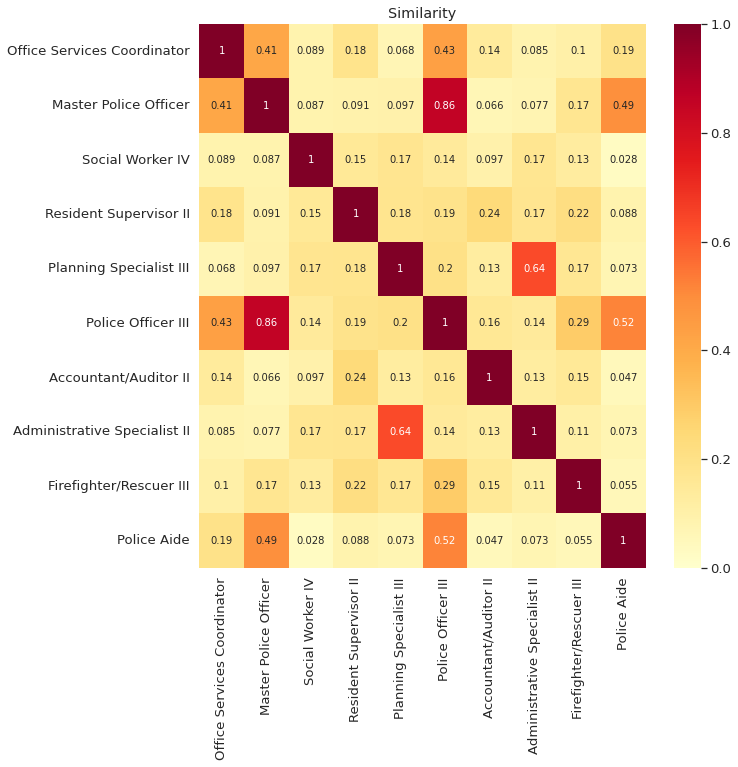

In [25]:
encode_and_plot(X_dirty[:10])

As we can see from the matrix above,
- The similarity between the same strings such as 'Office Services Coordinator' and 'Office Services Coordinator' is 1
- The similarity between somewhat similar strings such as 'Office Services Coordinator' and 'Master Police Officer' is 0.41
- The similarity between two very different strings such as 'Social Worker IV' and 'Polic Aide' is 0.028


[Link to dirty-cat](https://dirty-cat.github.io/).

[Link to my full article about dirty-cat](https://towardsdatascience.com/similarity-encoding-for-dirty-categories-using-dirty-cat-d9f0b581a552).

### Solving Data Mismatches: Joining Tables with Fuzzy Matching

In [ ]:
!pip install git+https://github.com/skrub-data/skrub.git

In [10]:
# We will ignore the warnings:
import warnings

warnings.filterwarnings("ignore")

Frequently, entries in one table may not have an exact match in another table. For instance, one table might have "Yemen*" while the other has "Yemen, Rep."

The `fuzzy_join()` function in skrub enables joining tables without the need for extensive data cleaning by accounting for the label variations.

In [13]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/skrub-data/datasets/master/data/Happiness_report_2022.csv",
    thousands=",",
)
df = df[["Country", "Happiness score"]]

In [14]:
from skrub.datasets import fetch_world_bank_indicator
gdppc = fetch_world_bank_indicator(indicator_id="NY.GDP.PCAP.CD").X

In [30]:
print(df.sort_values(by="Country").tail(6))

       Country  Happiness score
107  Venezuela           4925.0
76     Vietnam           5485.0
131     Yemen*           4197.0
136     Zambia           3760.0
143   Zimbabwe           2995.0
146         xx              NaN


In [19]:
print(gdppc.sort_values(by="Country Name").tail(5))

           Country Name  GDP per capita (current US$)
193  West Bank and Gaza                   3789.327966
255               World                  12647.480789
258         Yemen, Rep.                    701.714878
260              Zambia                   1487.907764
261            Zimbabwe                   1266.996031


In [33]:
from skrub import fuzzy_join

df1 = fuzzy_join(
    df,  # our table to join
    gdppc,  # the table to join with
    left_on="Country",  # the first join key column
    right_on="Country Name",  # the second join key column
    return_score=True,
)

print(df1[['Country', 'Country Name', "matching_score"]].tail(20))
# We merged the first WB table to our initial one.

          Country                                 Country Name  matching_score
127   Madagascar*                                   Madagascar        0.795045
128         Egypt                             Egypt, Arab Rep.        0.654033
129         Chad*                                         Chad        0.683373
130      Ethiopia                                     Ethiopia        1.000000
131        Yemen*                                  Yemen, Rep.        0.653668
132   Mauritania*                                   Mauritania        0.810736
133        Jordan                                       Jordan        1.000000
134          Togo                                         Togo        1.000000
135         India                                        India        1.000000
136        Zambia                                       Zambia        1.000000
137        Malawi                                       Malawi        1.000000
138      Tanzania                                   

[Link to skrub](https://github.com/skrub-data/skrub/).

### Snorkel — Programmatically Build Training Data in Python

In [ ]:
!pip install snorkel

Imagine you try to determine whether a job posting is fake or not. You come up with some assumptions about a fake job posting, such as:
* If a job posting has few to no descriptions about the requirements, it is likely to be fake.
* If a job posting does not include any company profile or logo, it is likely to be fake.
* If the job posting requires some sort of education or experience, it is likely to be real.

In [22]:
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


train_df = pd.read_pickle(
    "https://github.com/khuyentran1401/Data-science/blob/master/feature_engineering/snorkel_example/train_fake_jobs.pkl?raw=true"
)
train_df.head(5)

job_id                                      title             location  \
12276   12277                           Big Data Analyst      GB, WSM, London   
14680   14681                    Instructional Advocate      US, GA, Savannah   
16518   16519                         Software Developer  US, FL, Gainesville   
15478   15479                        Internship in India      IN, , Bangalore   
16348   16349  Web Developer Backend Microservices (m/f)        DE, BE, 10969   

        department salary_range  \
12276  Product Ops          NaN   
14680          NaN          NaN   
16518          NaN          NaN   
15478          NaN          NaN   
16348  Engineering          NaN   

                                         company_profile  \
12276  Founded in 2010 by a team from Google’s London...   
14680  We are an after-school program committed to as...   
16518  352 Inc. is a full-service digital agency crea...   
15478                                                      
16348  airfy prägt sicheres und einfach zu bedienende...   

                                             description  \
12276  Qubit: Cutting Edge Big Data EngineeringQubit ...   
14680  21st Century Community Learning Centers is an ...   
16518  We partner with great clients to build smart s...   
15478  London is a fast paced city of culture, divers...   
16348  Design and develop a microservice platform for...   

                                            requirements  \
12276  What you'll need: A background in consulting, ...   
14680  Bachelor's Degree or an Associate's Degree; or...   
16518  3-5 years of great c# work Experience in mvc o...   
15478                                                      
16348  Senior level experience with web backends, esp...   

                                                benefits  telecommuting  \
12276  Plenty of perks:As well as the opportunity to ...              0   
14680                                                NaN              0   
16518  What You’ll GetFreedom: We trust you to do you...              0   
15478  As specialists in delivering high quality and ...              0   
16348  Flat hierarchies and a productive work environ...              0   

       has_company_logo  has_questions employment_type required_experience  \
12276                 1              1       Full-time           Associate   
14680                 1              0       Part-time                 NaN   
16518                 1              0       Full-time    Mid-Senior level   
15478                 1              0             NaN                 NaN   
16348                 1              0       Full-time           Associate   

      required_education           industry                function  \
12276  Bachelor's Degree           Internet      Product Management   
14680                NaN                NaN               Education   
16518                NaN  Computer Software  Information Technology   
15478                NaN                NaN                     NaN   
16348  Bachelor's Degree           Internet             Engineering   

       fraudulent  
12276           0  
14680           0  
16518           0  
15478           0  
16348           0

<IPython.core.display.Javascript object>


How do you test which of these features are the most accurate in predicting fraud?

That is when Snorkel comes in handy. Snorkel is an open-source Python library for programmatically building training datasets without manual labeling. 

To learn how Snorkel works, start with giving a meaningful name to each value:

In [15]:
from snorkel.labeling import labeling_function, PandasLFApplier, LFAnalysis

FAKE = 1
REAL = 0
ABSTAIN = -1

<IPython.core.display.Javascript object>

We assume that:
- Fake companies don’t have company profiles or logos
- Fake companies are found in a lot of fake job postings
- Real job postings often requires a certain level of experience and education 

Let’s test those assumptions using Snorkel’s `labeling_function` decorator. The `labeling_function` decorator allows us to quickly label instances in a dataset using functions.

In [29]:
@labeling_function()
def no_company_profile(x: pd.Series):
    return FAKE if x.company_profile == "" else ABSTAIN


@labeling_function()
def no_company_logo(x: pd.Series):
    return FAKE if x.has_company_logo == 0 else ABSTAIN


@labeling_function()
def required_experience(x: pd.Series):
    return REAL if x.required_experience else ABSTAIN


@labeling_function()
def required_education(x: pd.Series):
    return REAL if x.required_education else ABSTAIN

<IPython.core.display.Javascript object>

`ABSTAIN` or `-1` tells Snorkel not to make any conclusion about the instance that doesn’t satisfy the condition.

Next, we will use each of these labeling functions to label our training dataset:

In [30]:
lfs = [
    no_company_profile,
    no_company_logo,
    required_experience,
    required_education,
]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=train_df)

100%|██████████████████████████████████████████████| 13410/13410 [00:02<00:00, 5849.25it/s]


<IPython.core.display.Javascript object>

Now that we have created the labels using each labeling function, we can use `LFAnalysis` to determine the accuracy of these labels.

In [31]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary(Y=train_df.fraudulent.values)

j Polarity  Coverage  Overlaps  Conflicts  Correct  \
no_company_profile   0      [1]  0.186204  0.186204   0.186204      459   
no_company_logo      1      [1]  0.205742  0.205742   0.205742      459   
required_experience  2      [0]  1.000000  1.000000   0.244295    12741   
required_education   3      [0]  1.000000  1.000000   0.244295    12741   

                     Incorrect  Emp. Acc.  
no_company_profile        2038   0.183821  
no_company_logo           2300   0.166365  
required_experience        669   0.950112  
required_education         669   0.950112

<IPython.core.display.Javascript object>

Details of the statistics in the table above:
* **Polarity**: The set of unique labels this LF outputs (excluding abstains)
* **Coverage**: The fraction of the dataset that is labeled
* **Overlaps**: The fraction of the dataset where this LF and at least one other LF agree
* **Conflicts**: The fraction of the dataset where this LF and at least one other LF disagree
* **Correct**: The number of data points this LF labels correctly
* **Incorrect**: The number of data points this LF labels incorrectly
* **Empirical** Accuracy: The empirical accuracy of this LF

[Link to Snorkel](https://www.snorkel.org/).

[My full article about Snorkel](https://towardsdatascience.com/snorkel-programmatically-build-training-data-in-python-712fc39649fe).

### sketch: AI Code-Writing Assistant That Understands Data Content

Wouldn't it be nice if you could get insights into your data by simply asking a question? Sketch allows you to do exactly that.

Sketch is an AI code-writing assistant for pandas users that understands the context of your data.

In [ ]:
!pip install sketch

In [3]:
import pandas as pd  
import seaborn as sns 
import sketch

In [18]:
data = sns.load_dataset('taxis')
data.head(10)

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   
5 2019-03-11 10:37:23 2019-03-11 10:47:31           1      0.49   7.5  2.16   
6 2019-03-26 21:07:31 2019-03-26 21:17:29           1      3.65  13.0  2.00   
7 2019-03-22 12:47:13 2019-03-22 12:58:17           0      1.40   8.5  0.00   
8 2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0  1.00   
9 2019-03-08 16:18:37 2019-03-08 16:26:57           1      1.52   8.0  1.00   

   tolls  total   color      payment                pickup_zone  \
0    0.0  12.95  yellow  credit card            Lenox Hill West   
1    0.0   9.30  yellow         cash      Upper West Side South   
2    0.0  14.16  yellow  credit card              Alphabet City   
3    0.0  36.95  yellow  credit card                  Hudson Sq   
4    0.0  13.40  yellow  credit card               Midtown East   
5    0.0  12.96  yellow  credit card  Times Sq/Theatre District   
6    0.0  18.80  yellow  credit card          Battery Park City   
7    0.0  11.80  yellow          NaN                Murray Hill   
8    0.0  19.30  yellow  credit card          East Harlem South   
9    0.0  13.30  yellow  credit card        Lincoln Square East   

              dropoff_zone pickup_borough dropoff_borough  
0      UN/Turtle Bay South      Manhattan       Manhattan  
1    Upper West Side South      Manhattan       Manhattan  
2             West Village      Manhattan       Manhattan  
3           Yorkville West      Manhattan       Manhattan  
4           Yorkville West      Manhattan       Manhattan  
5             Midtown East      Manhattan       Manhattan  
6  Two Bridges/Seward Park      Manhattan       Manhattan  
7                 Flatiron      Manhattan       Manhattan  
8           Midtown Center      Manhattan       Manhattan  
9             Central Park      Manhattan       Manhattan

In [20]:
data.sketch.ask(
    "Can you give me friendly names for each column?" 
    "(Output as an HTML list)"
)

In [21]:
data.sketch.ask(
    "Which payment is the most popular payment?"
)

In [22]:
data.sketch.howto("Create some features from the pickup column")

In [23]:

# Create a new column for the hour of the pickup
data['pickup_hour'] = data['pickup'].dt.hour

# Create a new column for the day of the week of the pickup
data['pickup_day'] = data['pickup'].dt.weekday

# Create a new column for the month of the pickup
data['pickup_month'] = data['pickup'].dt.month_name()


In [24]:
data.sketch.howto(
    "Create some features from the pickup_zone column"
)

In [25]:

# Create a new column called 'pickup_zone_count'
data['pickup_zone_count'] = data.groupby('pickup_zone')['pickup_zone'].transform('count')

# Create a new column called 'pickup_zone_fare'
data['pickup_zone_fare'] = data.groupby('pickup_zone')['fare'].transform('mean')

# Create a new column called 'pickup_zone_distance'
data['pickup_zone_distance'] = data.groupby('pickup_zone')['distance'].transform('mean')


In [26]:
data 

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  \
0                  UN/Turtle Bay South      Manhattan       Manhattan   
1                Upper West Side South      Manhattan       Manhattan   
2                         West Village      Manhattan       Manhattan   
3                       Yorkville West      Manhattan       Manhattan   
4                       Yorkville West      Manhattan       Manhattan   
...                                ...            ...             ...   
6428              Central Harlem North      Manhattan       Manhattan   
6429  East Concourse/Concourse Village         Queens           Bronx   
6430                    Bushwick North       Brooklyn        Brooklyn   
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn   
6432                   Windsor Terrace       Brooklyn        Brooklyn   

      pickup_hour  pickup_day pickup_month  pickup_zone_count  \
0              20           5        March              120.0   
1              16           0        March              144.0   
2              17           2        March                9.0   
3               1           6        March               47.0   
4              13           5        March              198.0   
...           ...         ...          ...                ...   
6428            9           6        March               72.0   
6429           17           6        March               12.0   
6430           22           5        March               12.0   
6431           10           0        March               10.0   
6432           19           2        March               21.0   

      pickup_zone_fare  pickup_zone_distance  
0             9.016667              1.857083  
1             9.987778              2.031597  
2            11.944444              2.796667  
3            11.000000              2.243830  
4            10.994949              2.239798  
...                ...                   ...  
6428         12.550000              2.854306  
6429         25.597500              7.261667  
6430         14.549167              3.665000  
6431         32.409000              7.086000  
6432         11.761905              2.812857  

[6433 rows x 20 c

[Link to sketch](https://github.com/approximatelabs/sketch).